<a href="https://colab.research.google.com/github/Navneet2409/netflix-movies-and-tv-shows-clustering/blob/main/Netflix_Notebook_Navneet_Keshri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name    - Netflix Movies and TV Shows Clustering**



##### **Project Type**    - Unsupervised Clustering and Recommendation System
##### **Contribution**    - Individual


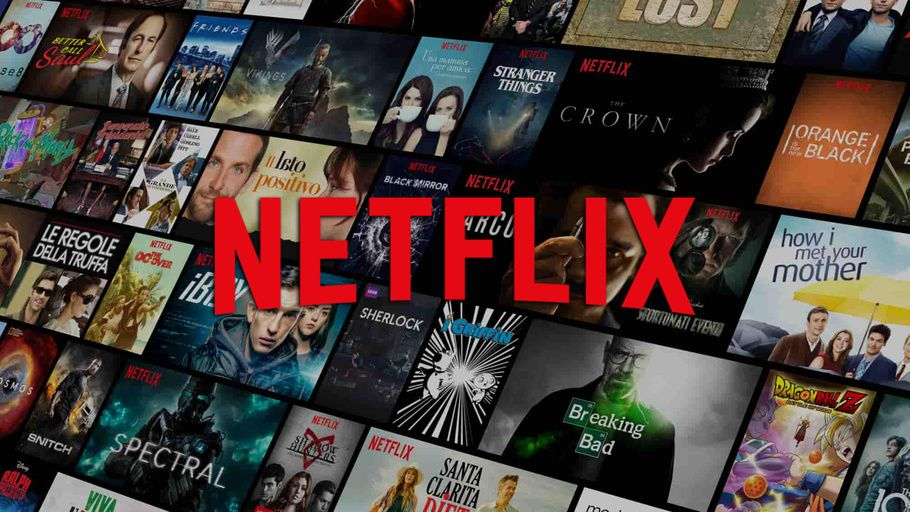

# **GitHub Link -**

https://github.com/Navneet2409/netflix-movies-and-tv-shows-clustering

# **Project Summary -**

Netflix movies and TV shows as of 2019 are included in this dataset. The dataset was gathered from the third-party Netflix search engine Flexible.

They published an intriguing report in 2018 demonstrating that the number of television shows on Netflix has nearly tripled since 2010. Since 2010, the number of movies on the streaming service has decreased by more than 2,000 titles, while the number of TV shows has nearly tripled. Seeing what other insights can be gleaned from the same dataset will be fascinating.

In this project, we tackled a text clustering problem in which we had to categorize and group Netflix movies and shows into specific clusters in such a way that the shows in one cluster are similar to one another and the shows in other clusters are not.

* There were approximately 7787 records and 11 attributes in the dataset.

* We started by working on the missing values in the dataset and conducting exploratory data analysis (EDA).

* Using the following attributes to create a cluster: cast, country, genre, director, rating, and description The TFIDF vectorizer was used to tokenize, preprocess, and vectorize the values in these attributes.

* The problem of dimensionality was dealt with through the use of Principal Component Analysis (PCA).

* Using a variety of methods, including the elbow method, silhouette score, dendrogram, and others, we constructed two distinct types of clusters with the K-Means Clustering and Agglomerative Hierarchical clustering algorithms, respectively, and determined the optimal number of clusters.

* The similarity matrix generated by applying cosine similarity was used to construct a content-based recommender system. The user will receive ten recommendations from this recommender system based on the type of show they watched.

# **Index**

1.   Problem Statement
2.   Importing the Libraries and the Dataset
3.   Understanding Data
4.   Exploratory Data Analysis
5.   Data Cleaning
6.   Textual Data Preprocessing
7.   Clusters Impelementation
8.   Recommendation System.
9.   Conclusion

# **Let's Begin !**

## **1. Problem Statement**

As of 2022-Q2, more than 220 million people had signed up for Netflix's online streaming service, making it the largest OTT provider worldwide. To improve the user experience and prevent subscriber churn, they must efficiently cluster the shows hosted on their platform.

By creating clusters, we will be able to comprehend the shows that are alike and different from one another. These clusters can be used to provide customers with individualized show recommendations based on their preferences.

This project aims to classify and group Netflix shows into specific clusters in such a way that shows in the same cluster are similar to one another and shows in different clusters are different.

## **2. Know Your Data**

### Import Libraries

In [3]:
# Import Libraries and modules

# libraries that are used for analysis and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# libraries used to process textual data
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# libraries used to implement clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# libraries that are used to construct a recommendation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Dataset Loading

In [4]:
# load the NETFLIX MOVIES AND TV SHOWS CLUSTERING data set from the drive
netflix_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project Docs/Netflix Movies and TV Shows Clustering - Navneet Keshri/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [5]:
# Viewing the top 5 rows to take a glimpse of the data
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
# Viewing the last 5 rows
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns Count

In [7]:
# Dataset Rows & Columns 
netflix_df.shape

(7787, 12)

In [8]:
print(f'number of rows : {netflix_df.shape[0]}  \nnumber of columns : {netflix_df.shape[1]}')

number of rows : 7787  
number of columns : 12


### Dataset Information

In [9]:
# Dataset Info
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


### Unique values

In [10]:
# print the unique values in each column
netflix_df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

### Duplicate Values

**How important is it to get rid of duplicate records in my data?**

The mere presence of repeated data in the dataset is referred to as "duplication." This could be caused by incorrect data entry or procedures for collecting data. We can save time and money by not sending the same data to the machine learning model multiple times by removing duplicate data from our set.

In [12]:
# Checking Duplicate Values
value = len(netflix_df[netflix_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


We found that there were no duplicate entries in the above data.

### Missing Values/Null Values

**Why dealing with missing values is necessary?**

There are frequently a lot of missing values in the actual data. Corrupted or missing data may result in missing values. Since many machine-learning algorithms do not support missing values, missing data must be handled during the dataset's pre-processing. Therefore, we begin by looking for values that are missing.

In [13]:
# Missing Values/Null Values Count
print(netflix_df.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


In [14]:
# Missing Values Percentage
round(netflix_df.isna().sum()/len(netflix_df)*100, 2)

show_id          0.00
type             0.00
title            0.00
director        30.68
cast             9.22
country          6.51
date_added       0.13
release_year     0.00
rating           0.09
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

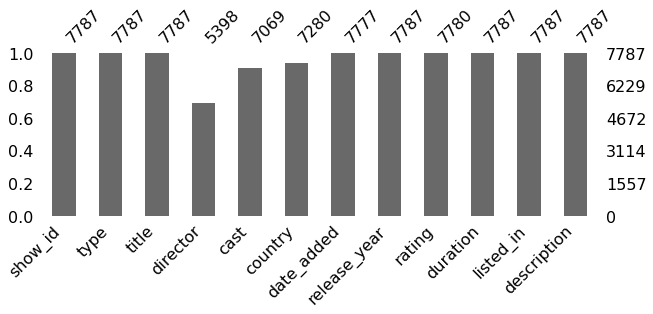

In [18]:
# Visualizing the missing values
import missingno as msno
msno.bar(netflix_df, figsize=(10,3))